BAYES INGENUO

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

CARGA DEL SET DE DATOS

In [13]:
data = pd.read_csv('./Claseficación_banco.csv')


PREPROCESAMIENTO

In [16]:
X = data.drop('not.fully.paid', axis=1)  # Variables predictoras
y = data['not.fully.paid']  # Variable objetivo

Manejo de Variables Categoricas

In [17]:
# Codificación de variables categóricas
X = pd.get_dummies(X, drop_first=True)


Dividimos los datos en conjuntos de prueba y de entrenamiento

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

MODELO DEL BAYES INGENUO

In [20]:
# Modelo de Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)


GaussianNB()

PREDICCIONES

In [21]:
# Predicciones
y_pred = model_nb.predict(X_test)

EVALUACION DEL MODELO NAIVES BAYES

In [22]:
# Evaluación del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2309   99]
 [ 424   42]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2408
           1       0.30      0.09      0.14       466

    accuracy                           0.82      2874
   macro avg       0.57      0.52      0.52      2874
weighted avg       0.76      0.82      0.78      2874



In [23]:
cm = confusion_matrix(y_test, y_pred)

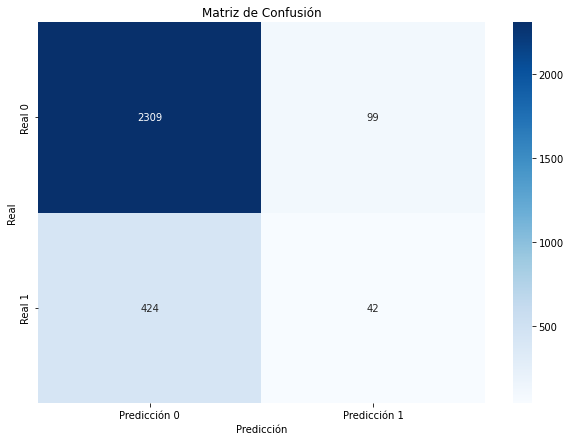

In [24]:
# Grafico la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicción 0', 'Predicción 1'], 
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

REPORTE

In [25]:
# Resumen de la matriz de confusión
TN, FP, FN, TP = cm.ravel()
print(f"Verdaderos Negativos (TN): {TN} (el modelo predijo 0 y la clase real era 0).")
print(f"Falsos Positivos (FP): {FP} (el modelo predijo 1 pero la clase real era 0).")
print(f"Falsos Negativos (FN): {FN} (el modelo predijo 0 pero la clase real era 1).")
print(f"Verdaderos Positivos (TP): {TP} (el modelo predijo 1 y la clase real era 1).")

Verdaderos Negativos (TN): 2309 (el modelo predijo 0 y la clase real era 0).
Falsos Positivos (FP): 99 (el modelo predijo 1 pero la clase real era 0).
Falsos Negativos (FN): 424 (el modelo predijo 0 pero la clase real era 1).
Verdaderos Positivos (TP): 42 (el modelo predijo 1 y la clase real era 1).


CURVA ROC

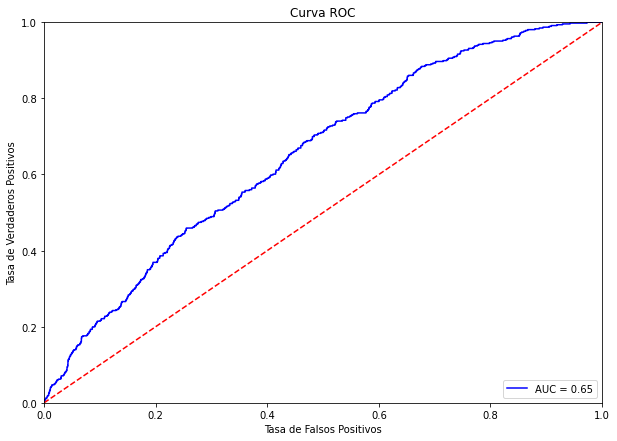

In [27]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción
y_probs = model_nb.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label='AUC = %.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Matriz de Confusión Normalizada

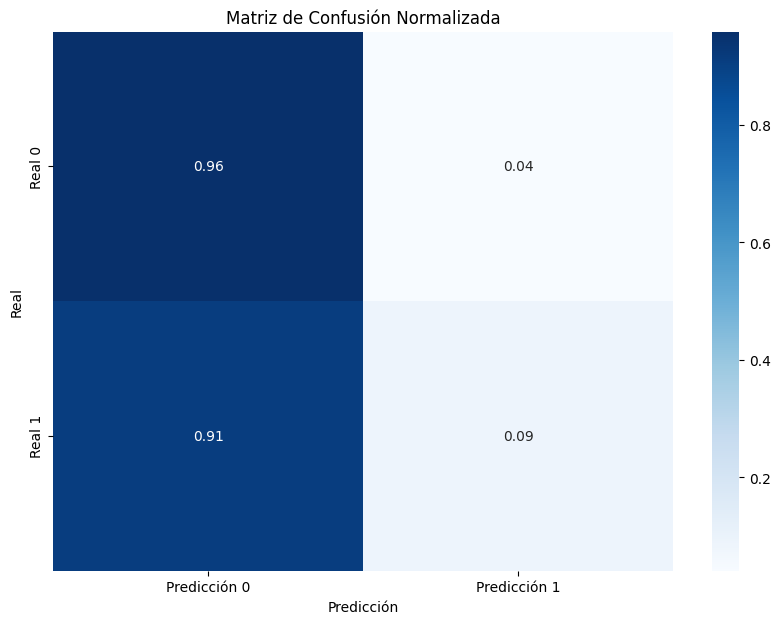

In [33]:
# Matriz de confusión normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión normalizada
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['Predicción 0', 'Predicción 1'], 
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión Normalizada')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


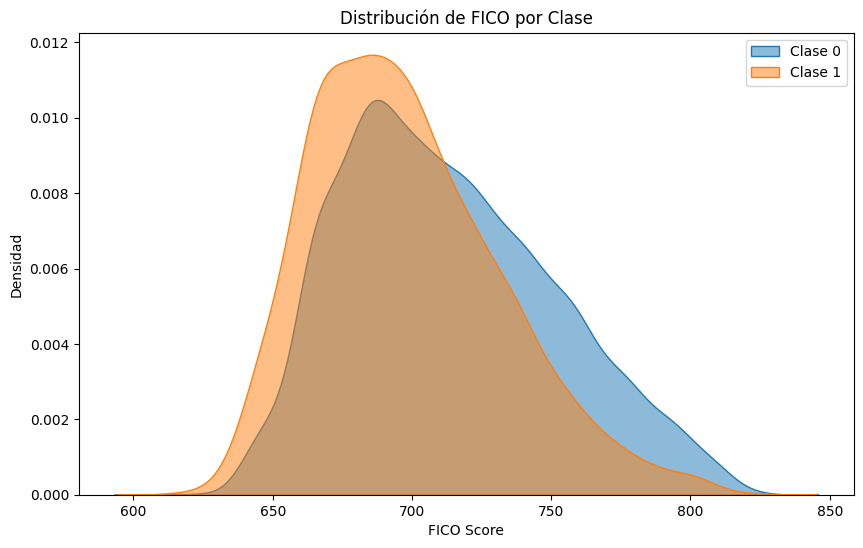

In [37]:
# Usando el campo puntuación FICO
plt.figure(figsize=(10, 6))
sns.kdeplot(data.loc[data['not.fully.paid'] == 0, 'fico'], label='Clase 0', fill=True, alpha=0.5)
sns.kdeplot(data.loc[data['not.fully.paid'] == 1, 'fico'], label='Clase 1', fill=True, alpha=0.5)
plt.title('Distribución de FICO por Clase')
plt.xlabel('FICO Score')
plt.ylabel('Densidad')
plt.legend()
plt.show()


#Hay dos curvas, una para cada clase de la variable not.fully.paid:
#Clase 0 (color 1): Representa a aquellos prestatarios que pagaron completamente su préstamo.
#Clase 1 (color 2): Representa a aquellos prestatarios que no pagaron completamente su préstamo.
#Cada curva indica la concentración de puntuaciones FICO en la clase correspondiente. Las áreas donde las curvas son más #altas indican una mayor densidad de prestatarios con esa puntuación específica.
#Interpretación de las Curvas:

#Clase 0 (Pagadores Completos):
#Es probable que la mayoría de los prestatarios en esta clase tengan puntuaciones FICO más altas. Esto puede indicar que #los prestatarios que pagan sus préstamos tienden a tener un mejor historial crediticio.
#Clase 1 (No Pagadores):
#Es probable que esta curva esté más desplazada hacia puntuaciones FICO más bajas. Esto sugiere que los prestatarios que #no pagaron sus préstamos tienden a tener un historial crediticio menos favorable.



#Conclusión:

#Este gráfico es útil para visualizar la relación entre la puntuación FICO y la probabilidad de que un prestatario no #pague su préstamo.
#Al observar que una gran parte de los prestatarios que no pagaron tienen puntuaciones FICO más bajas, puedes inferir que #la puntuación de crédito es un factor importante en la capacidad de pago de un prestatario.